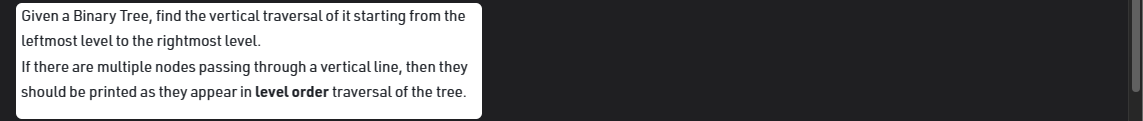

In [ ]:
#define Node TreeNode
#define data val

In [ ]:
class Solution {
//use maps and level order traversal
  public:
    vector<vector<int>> verticalOrder(Node *root) {
        if(!root) return {};
        vector<vector<int>> ans;
        queue<pair<Node*, int>> q;
        q.push({root,0});
        unordered_map<int,vector<int>> mapOfX2Elements;
        int maxx=INT_MIN, minn=INT_MAX;
        while(q.size()){
            auto v=q.front();
            q.pop();
            int xCoordinate=v.second;
            minn=min(minn, xCoordinate);
            maxx=max(maxx, xCoordinate);
            int value=v.first->data;
            mapOfX2Elements[xCoordinate].push_back(value);
            if(v.first->left) q.push({v.first->left, xCoordinate-1});
            if(v.first->right) q.push({v.first->right, xCoordinate+1});        
        }
        
        vector<int> tmp;
        for(int i=minn;i<=maxx;i++){
            for(int elem: mapOfX2Elements[i]){
                tmp.push_back(elem);
            }
            ans.push_back(tmp);
            tmp.clear();
        }
        return ans;
    }
};

leetcode    
There may be multiple nodes in the same row and same column. In such a case, sort these nodes by their values.

https://leetcode.com/problems/vertical-order-traversal-of-a-binary-tree/

we have to do sorting based on values so preserving the heights before hand

In [ ]:
#define Node TreeNode
#define data val
class Solution {
public:

    vector<vector<int>> verticalTraversal(TreeNode* root) {
        if(!root) return {};
        vector<vector<int>> ans;
        queue<pair<Node*, int>> q;
        q.push({root,0});
        unordered_map<int,vector<pair<int,int>>> mapOfX2Elements;
        int maxx=INT_MIN, minn=INT_MAX;
        int yCoordinate=0;
        while(q.size()){
            int sz=q.size();
            yCoordinate++;
            while(sz--){
                auto v=q.front();
                q.pop();
                int xCoordinate=v.second;
                minn=min(minn, xCoordinate);
                maxx=max(maxx, xCoordinate);
                int value=v.first->val;
                mapOfX2Elements[xCoordinate].push_back({yCoordinate,value});
                if(v.first->left) q.push({v.first->left, xCoordinate-1});
                if(v.first->right) q.push({v.first->right, xCoordinate+1}); 
            }

        }
        
        vector<pair<int,int>> tmp;
        vector<int> tmp2;
        for(int i=minn;i<=maxx;i++){
            tmp = mapOfX2Elements[i];
            sort(tmp.begin(), tmp.end());
            vector<int> tmp2;
            for(auto info : tmp) {
                tmp2.push_back(info.second);
            }
            ans.push_back(tmp2);
            tmp.clear();
            tmp2.clear();
        }
        return ans;
    }
};

gfg If there are multiple nodes passing through a vertical line and horizontal line, print them according to order they came in level order traversal

https://www.geeksforgeeks.org/problems/print-a-binary-tree-in-vertical-order/1

by luck it is not creating any issue, if create a issue use a global variable

# Archieved naive


In [ ]:
void preorder(vector<vector<int>> &coordinates, Node *node, int x, int y){
    if(!node) return;
    v.push_back({x,y,c,node->data});
    c++; // c is getting updated after each function calls
    if(node->left) preorder(coordinates,node->left,x-1,y+1);
    if(node->right) preorder(coordinates,node->right,x+1,y+1);        
}

vector<int> verticalOrder(Node *root){
    vector<vector<int>> coordinates;
    preorder(coordinates,root,0,0);
    sort(v.begin(),v.end());
    vector<int> ans;
    for(auto vv:v) ans.push_back(vv[3]);
    return ans;
}

# Top View      
Each node on the top have a different x
In level order traversal, whenever you see a x for the first time, it is part of top view


https://practice.geeksforgeeks.org/problems/top-view-of-binary-tree/1

In [ ]:
unordered_map<int,int> mp;
queue<pair<Node*, int>> q;
q.push({root,0});
int minn=INT_MAX,maxx=INT_MIN;
while(q.size()){
    auto p=q.front();
    q.pop();
    minn=min(minn,p.second);
    maxx=max(maxx,p.second);
    if(!mp.count(p.second)) mp[p.second]=p.first->data;
    if(p.first->left) q.push({p.first->left,p.second-1});
    if(p.first->right) q.push({p.first->right,p.second+1});
}
for(int i=minn;i<=maxx;i++) ans.push_back(mp[i]);

# Bottom view
The last level will be bottom view

https://www.geeksforgeeks.org/problems/bottom-view-of-binary-tree/1

In [ ]:
vector <int> bottomView(Node *root) {
    vector<int> ans;
    if(!root) return ans;
    unordered_map<int,int> mp;
    queue<pair<Node*, int>> q;
    q.push({root,0});
    int minn=INT_MAX,maxx=INT_MIN;
    while(!q.empty()){
        pair<Node*,int> p=q.front();q.pop();
        minn=min(minn,p.second);
        maxx=max(maxx,p.second);
        mp[p.second]=p.first->data;
        if(p.first->left) q.push({p.first->left,p.second-1});
        if(p.first->right) q.push({p.first->right,p.second+1});
    }
    for(int i=minn;i<=maxx;i++) ans.push_back(mp[i]);
    return ans;
}

# All leaf views of a binary tree from left to right